### Import Libraries

In [1]:
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

### Load the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('Depression and  Happiness Factor Analysis_1604050.csv')
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,Not applicable,Yes,No,Yes,No,No,6
1,4th year,Good,80,Male,25,Home,In a relationship,Yes,3,Good,No,No,Yes,No one,Yes,No,Neutral,No,No,6
2,4th year,Very good,90,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Yes,No,No,7
3,4th year,Normal,70,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Neutral,No,No,8
4,1st year,Normal,50,Male,22,Home,In a relationship,Yes,3,Normal,Yes,No,Yes,No one,No,No,Yes,No,No,6


In [3]:
# Renaming the columns
df.columns = ['Education', 'Emotion_category','Scale','Gender','Age','Location','Relationship_status','Financial_state',' cope_with_environment','Understanding_with_family',
              'Feeling_in_study_work','Academic_result','Living_place','Who_supports?','social_media_activity','Inferiority_complex?','Todays_meal','Health_issues',
            'Recreational_activity','Sleeping_last_night']

df.head()

,Education,Emotion_category,Scale,Gender,Age,Location,Relationship_status,Financial_state,cope_with_environment,Understanding_with_family,Feeling_in_study_work,Academic_result,Living_place,Who_supports?,social_media_activity,Inferiority_complex?,Todays_meal,Health_issues,Recreational_activity,Sleeping_last_night
0,4th year,Normal,50,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,Not applicable,Yes,No,Yes,No,No,6
1,4th year,Good,80,Male,25,Home,In a relationship,Yes,3,Good,No,No,Yes,No one,Yes,No,Neutral,No,No,6
2,4th year,Very good,90,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Yes,No,No,7
3,4th year,Normal,70,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Neutral,No,No,8
4,1st year,Normal,50,Male,22,Home,In a relationship,Yes,3,Normal,Yes,No,Yes,No one,No,No,Yes,No,No,6


In [4]:
X_selected=df[['Scale', 'Age']].values
X_selected

array([[50, 25],
       [80, 25],
       [90, 25],
       ...,
       [99, 22],
       [95, 24],
       [75, 23]], dtype=int64)

In [5]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scale_X=StandardScaler()   #scale_X IS AN OBJECT
X_selected=scale_X.fit_transform(X_selected)
X_selected

array([[-0.42396756,  1.14023949],
       [ 0.66513367,  1.14023949],
       [ 1.02816741,  1.14023949],
       ...,
       [ 1.35489778, -0.25029647],
       [ 1.20968429,  0.6767275 ],
       [ 0.4836168 ,  0.21321551]])

### Visualize the Raw Data

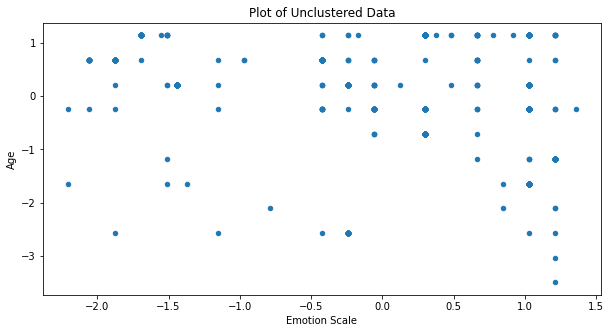

In [6]:
df = pd.DataFrame(dict(x=X_selected[:,0], y=X_selected[:,1]))
fig, ax = plt.subplots(figsize=(10,5))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('Emotion Scale')
plt.ylabel('Age')
plt.title('Plot of Unclustered Data')
plt.show()

### Finding the optimal no. of clusters by ELBOW METHOD

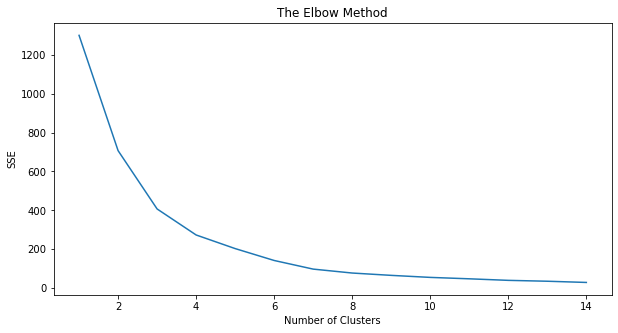

In [25]:
from sklearn.cluster import KMeans
SSE=[]   #SUM OF SQUARED ERROR
for i in range(1,15):
    classifier=KMeans(n_clusters=i,init='k-means++',random_state=42) 
    classifier.fit(X_selected)
    SSE.append(classifier.inertia_)
plt.figure(figsize=(10,5))  
plt.plot(range(1,15),SSE)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Functions for K-means

In [28]:
def initialize_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [29]:
def calculate_dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [30]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(calculate_dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [31]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [32]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=calculate_dist(a,b)
    return res

In [83]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'red', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='h', s=200, c='#800080')
    plt.xlabel('Feature_1')
    plt.ylabel('Feature_2')
    plt.show()

### Putting it altogether to form K-means clustering

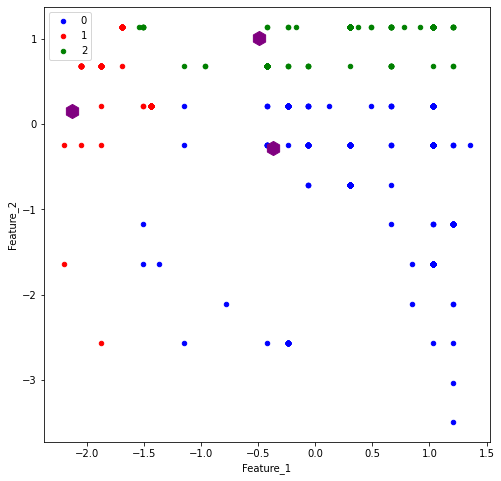

Co-ordinates of the centroids after each iteration:
 [[ 0.49976336 -0.69359718]
 [-1.67982819  0.51468673]
 [ 0.18961898  0.95787412]]


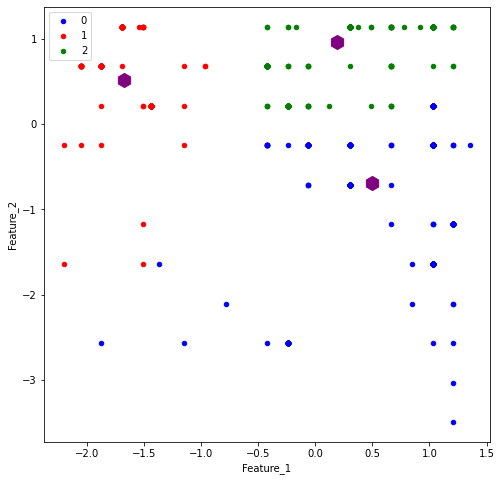

Co-ordinates of the centroids after each iteration:
 [[ 0.61215037 -0.83751605]
 [-1.64645008  0.53252377]
 [ 0.18755366  0.80371709]]


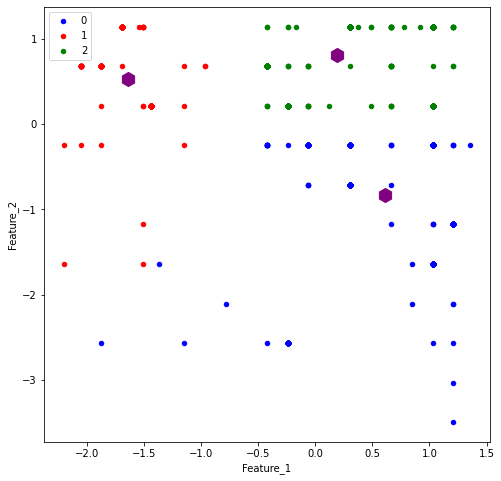

Co-ordinates of the centroids after each iteration:
 [[ 0.56523115 -0.95601961]
 [-1.64645008  0.53252377]
 [ 0.28883243  0.73257232]]


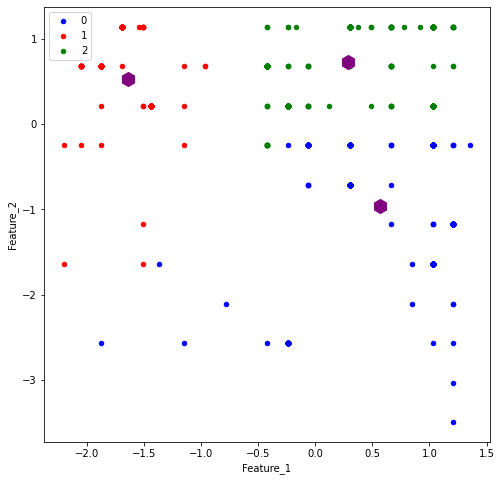

Co-ordinates of the centroids after each iteration:
 [[ 0.59196625 -0.97509321]
 [-1.64645008  0.53252377]
 [ 0.2693418   0.705697  ]]


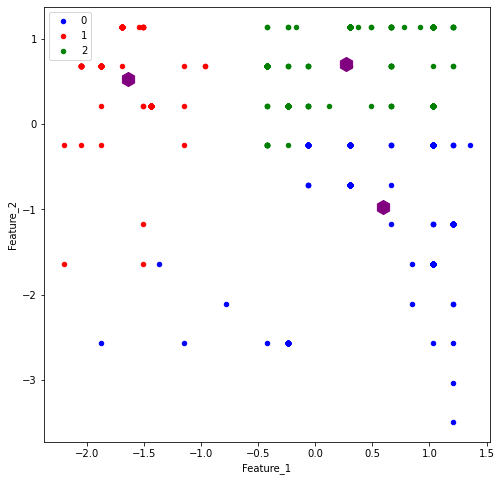

Co-ordinates of the centroids after each iteration:
 [[ 0.59520043 -0.9779025 ]
 [-1.64645008  0.53252377]
 [ 0.26735039  0.70197718]]


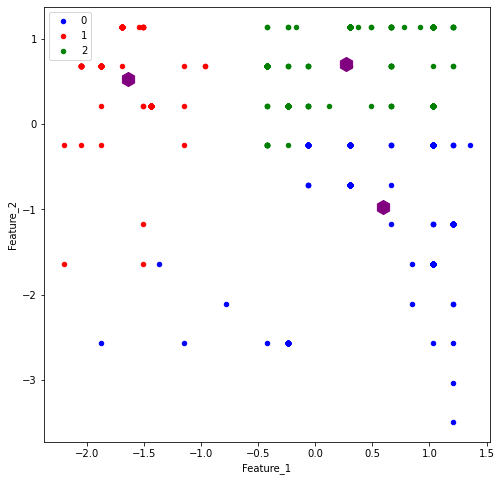

Co-ordinates of the centroids after each iteration:
 [[ 0.59520043 -0.9779025 ]
 [-1.64645008  0.53252377]
 [ 0.26735039  0.70197718]]


In [84]:
def K_means_clustering(k, X):
    cg_prev = initialize_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
        print('Co-ordinates of the centroids after each iteration:\n',cg_prev)
    return cluster

cluster = K_means_clustering(3, X_selected) # Using the optimal k value

### K-means Clustering using Scikit-learn

In [85]:
# Fitting K-means to the data
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42).fit(X_selected)

In [86]:
# Predict the cluster for each data point
clusters = kmeans.predict(X_selected)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1,
       0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0,
       1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1,

In [87]:
# Printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[ 0.69661953, -1.13997588],
       [ 0.24764486,  0.55475066],
       [-1.64645008,  0.53252377]])